In [44]:
import xml.etree.ElementTree as ET

In [45]:
# read in xml data from file
tree = ET.parse("H07152021_133059.xml")
root = tree.getroot()

In [46]:
# lists for storing training and validation loss values
training_loss = []
validation_loss = []

# loop through results in XML file
for result_view in root:
    # store tool name
    tool_name = result_view.attrib["Tool"]
    # check if tool name is Train Deep Learning Model
    if tool_name == "Train Deep Learning Model":
        # loop through tool's attributes
        for attributes in result_view:
            if attributes.tag == "Messages":
                # loop through messages - this is where the training loss and validation loss values are stored
                log_loss_values = False
                for message in attributes:
                    # stop logging loss values after we see the "average_precision_score" appear
                    if "average_precision_score" in message.text:
                        log_loss_values = False
                    
                    # if this is true, start logging and parsing the loss values
                    if log_loss_values:
                        # split creates a list with two elements (training and validation loss)
                        tloss, vloss = message.text.split()
                        # convert values from strings to float and store in lists
                        training_loss.append(float(tloss))
                        validation_loss.append(float(vloss))
                    
                    # start logging loss values after we see the training and validation loss headers
                    if "Training Loss" in message.text:
                        log_loss_values = True
                        
print(f"Training loss:\n{training_loss}\n\n")
print(f"Validation loss:\n{validation_loss}")

Training loss:
[27.025306701660156, 33.35752487182617, 28.515592575073242, 35.70825958251953, 27.037824630737305, 39.20478439331055, 38.19881057739258, 26.177635192871094, 22.40571403503418, 26.89358901977539, 25.498929977416992, 27.010753631591797, 25.130876541137695, 31.383892059326172, 24.442350387573242, 24.10081672668457, 25.39626121520996, 23.28352165222168, 23.02411460876465, 28.37607765197754, 22.479511260986328, 22.469160079956055, 22.35851287841797, 22.058366775512695, 21.862070083618164]


Validation loss:
[20.43377113342285, 21.283010482788086, 21.57732391357422, 239.58465576171875, 116.75675201416016, 783.4039916992188, 20.072912216186523, 18.382415771484375, 17.425878524780273, 16.300352096557617, 16.077308654785156, 17.26930046081543, 15.600499153137207, 16.418596267700195, 15.26983642578125, 15.034682273864746, 14.536450386047363, 14.795909881591797, 14.057734489440918, 15.781693458557129, 13.91643238067627, 14.367249488830566, 13.842625617980957, 15.818318367004395, 15

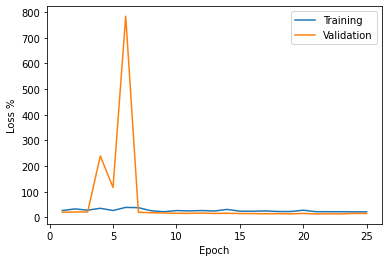

In [47]:
# graph the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline

epochs = list(range(1, len(training_loss) + 1))

plt.figure()
plt.plot(epochs, training_loss, label="Training")
plt.plot(epochs, validation_loss, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss %")
plt.legend(loc="upper right")
plt.title("")

plt.show()